# Software Midterm Data Analysis
Exploratory data analysis on midterm exam resutls.
## Questions:
- What is the most difficult questions for all students?
- what is the distribution and diffrence between the top score students and the bottom?
## Dataset:
The dataset is results of midterm exam in Software Engineering course in my collage, it contains the following columns:
- `Stud_ID`: represents the ID of the student.
- `MCQ1`-`MCQ16`: The answers of the 16 questions in the exam [A, B, C, D, E].
- `score`: the score of the student, in range from [0-15].
- `finalGrade (7+1)`: the final grade of the student (out of 7) + one bouns.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.max_column', 30)
sns.set_style('whitegrid')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [2]:
df = pd.read_csv('fcai_db_cs251_midterm.csv')
df.head()

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade (7+1)
0,20150383,D,B,C,D,D,A,C,A,D,B,A,B,B,B,D,E,7,4.5
1,20170252,A,E,C,E,E,A,D,E,C,B,A,B,E,C,E,E,7,4.5
2,20170456,A,B,C,D,E,E,E,E,C,D,A,B,D,C,A,B,9,5.0
3,20180129,D,E,E,E,D,D,A,E,C,D,A,B,D,C,C,E,9,5.0
4,20180467,D,E,D,E,D,A,C,A,A,C,A,B,E,D,C,E,7,3.5


In [3]:
df = df.rename(columns={'finalGrade (7+1)': 'finalGrade7_1'})

## Quick look at the dataset

In [4]:
df[['score', 'finalGrade7_1']].describe().round()

,score,finalGrade7_1
count,609.0,609.0
mean,9.0,5.0
std,2.0,1.0
min,3.0,2.0
25%,7.0,4.0
50%,9.0,5.0
75%,10.0,6.0
max,15.0,8.0


There are small number of null values in some columns 

In [5]:
df.isnull().sum()

Stud_ID          0
MCQ1             1
MCQ2             0
MCQ3             0
MCQ4             1
MCQ5             0
MCQ6             1
MCQ7             1
MCQ8             1
MCQ9             0
MCQ10            1
MCQ11            1
MCQ12            0
MCQ13            0
MCQ14            0
MCQ15            0
MCQ16            1
score            0
finalGrade7_1    0
dtype: int64

In [6]:
# drop all NA values
df = df.dropna()

There is no duplicates in the dataset

In [7]:
df[df.duplicated(keep=False)]

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade7_1


Interesting, There's one outlier :)

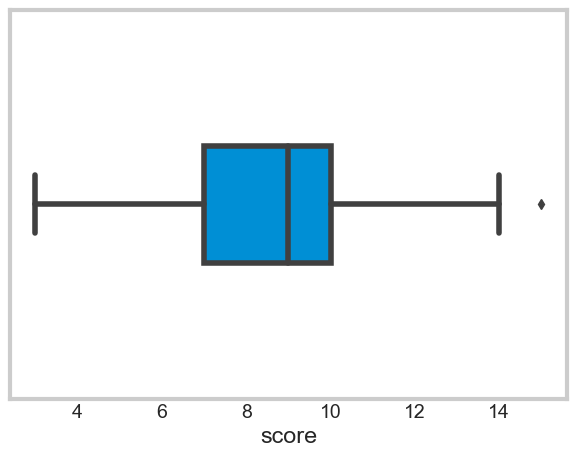

In [8]:
sns.boxplot(x=df['score'], width=0.3, saturation=1)
plt.grid(False)
plt.show()

In [9]:
correct_ans = df[df['score'] > 14]
correct_ans

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade7_1
86,20210127,D,B,C,B,D,A,E,E,C,A,A,B,D,C,A,E,15,8.0


## Let's Visualize!

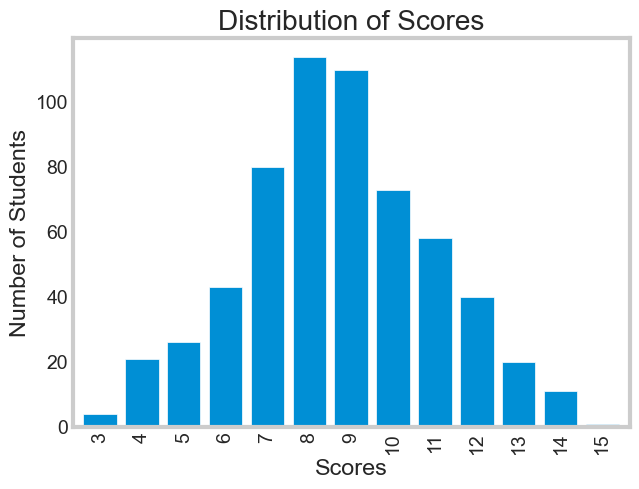

In [10]:
df['score'].value_counts() \
    .sort_index() \
    .plot(kind='bar',
          width=0.8)
plt.xlabel('Scores')
plt.ylabel('Number of Students')
plt.title('Distribution of Scores')
plt.grid(False)
plt.show()

In [11]:
def pass_or_fail(finalGrade):
    if finalGrade > 4:
        return 'Pass'
    else:
        return 'Fail'

df['pass_or_fail'] = df['finalGrade7_1'].apply(pass_or_fail)

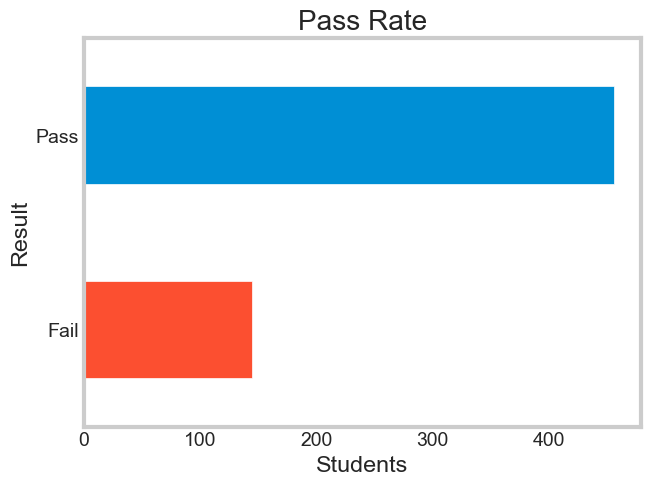

In [12]:
df['pass_or_fail'].value_counts().sort_values() \
    .plot(kind='barh',
          color=[color_pal[1], color_pal[0]],
          width=0.5)
plt.ylabel('Result')
plt.xlabel('Students')
plt.title('Pass Rate')
plt.grid(False)
plt.show()

In [13]:
questions = ['MCQ1', 'MCQ2', 'MCQ3', 'MCQ4', 'MCQ5', 'MCQ6', 'MCQ7','MCQ8', 'MCQ9', 'MCQ10', 'MCQ11', 'MCQ12', 'MCQ13', 'MCQ14', 'MCQ15','MCQ16']
# This function takes DataFrame as parameter and return a new one as answers count for each quesiton
def count_answers(df):
    my_list = []
    for q in questions:
        temp = df.groupby(q)['Stud_ID'] \
            .count() \
            .to_frame(name=q)
        my_list.append(temp)
    result = pd.concat(my_list, axis=1)
    return (result.fillna(0))

## Students Grouping
#### Here, we will group students into two groups (each one of 120 student):
 - Top, who get highest score
 - Bottom, who get lowest score

In [14]:
# Create the two DataFrames
top_df = df.sort_values('score', ascending=False).head(120)
bottom_df = df.sort_values('score', ascending=True).head(120)
top_df = count_answers(top_df)
bottom_df = count_answers(bottom_df)

In [15]:
# then, prepare them for ploting
top_df['Class'] = top_df['Class'] = 'Top'
bottom_df['Class'] = bottom_df['Class'] = 'Bottom'
top_df = top_df.sort_index()
bottom_df = bottom_df.sort_index()
dss = pd.concat([top_df, bottom_df])

- questions 2,4,5,6,8 have some level of difficulty
- results in 15 and 16 are opposite from other questions 

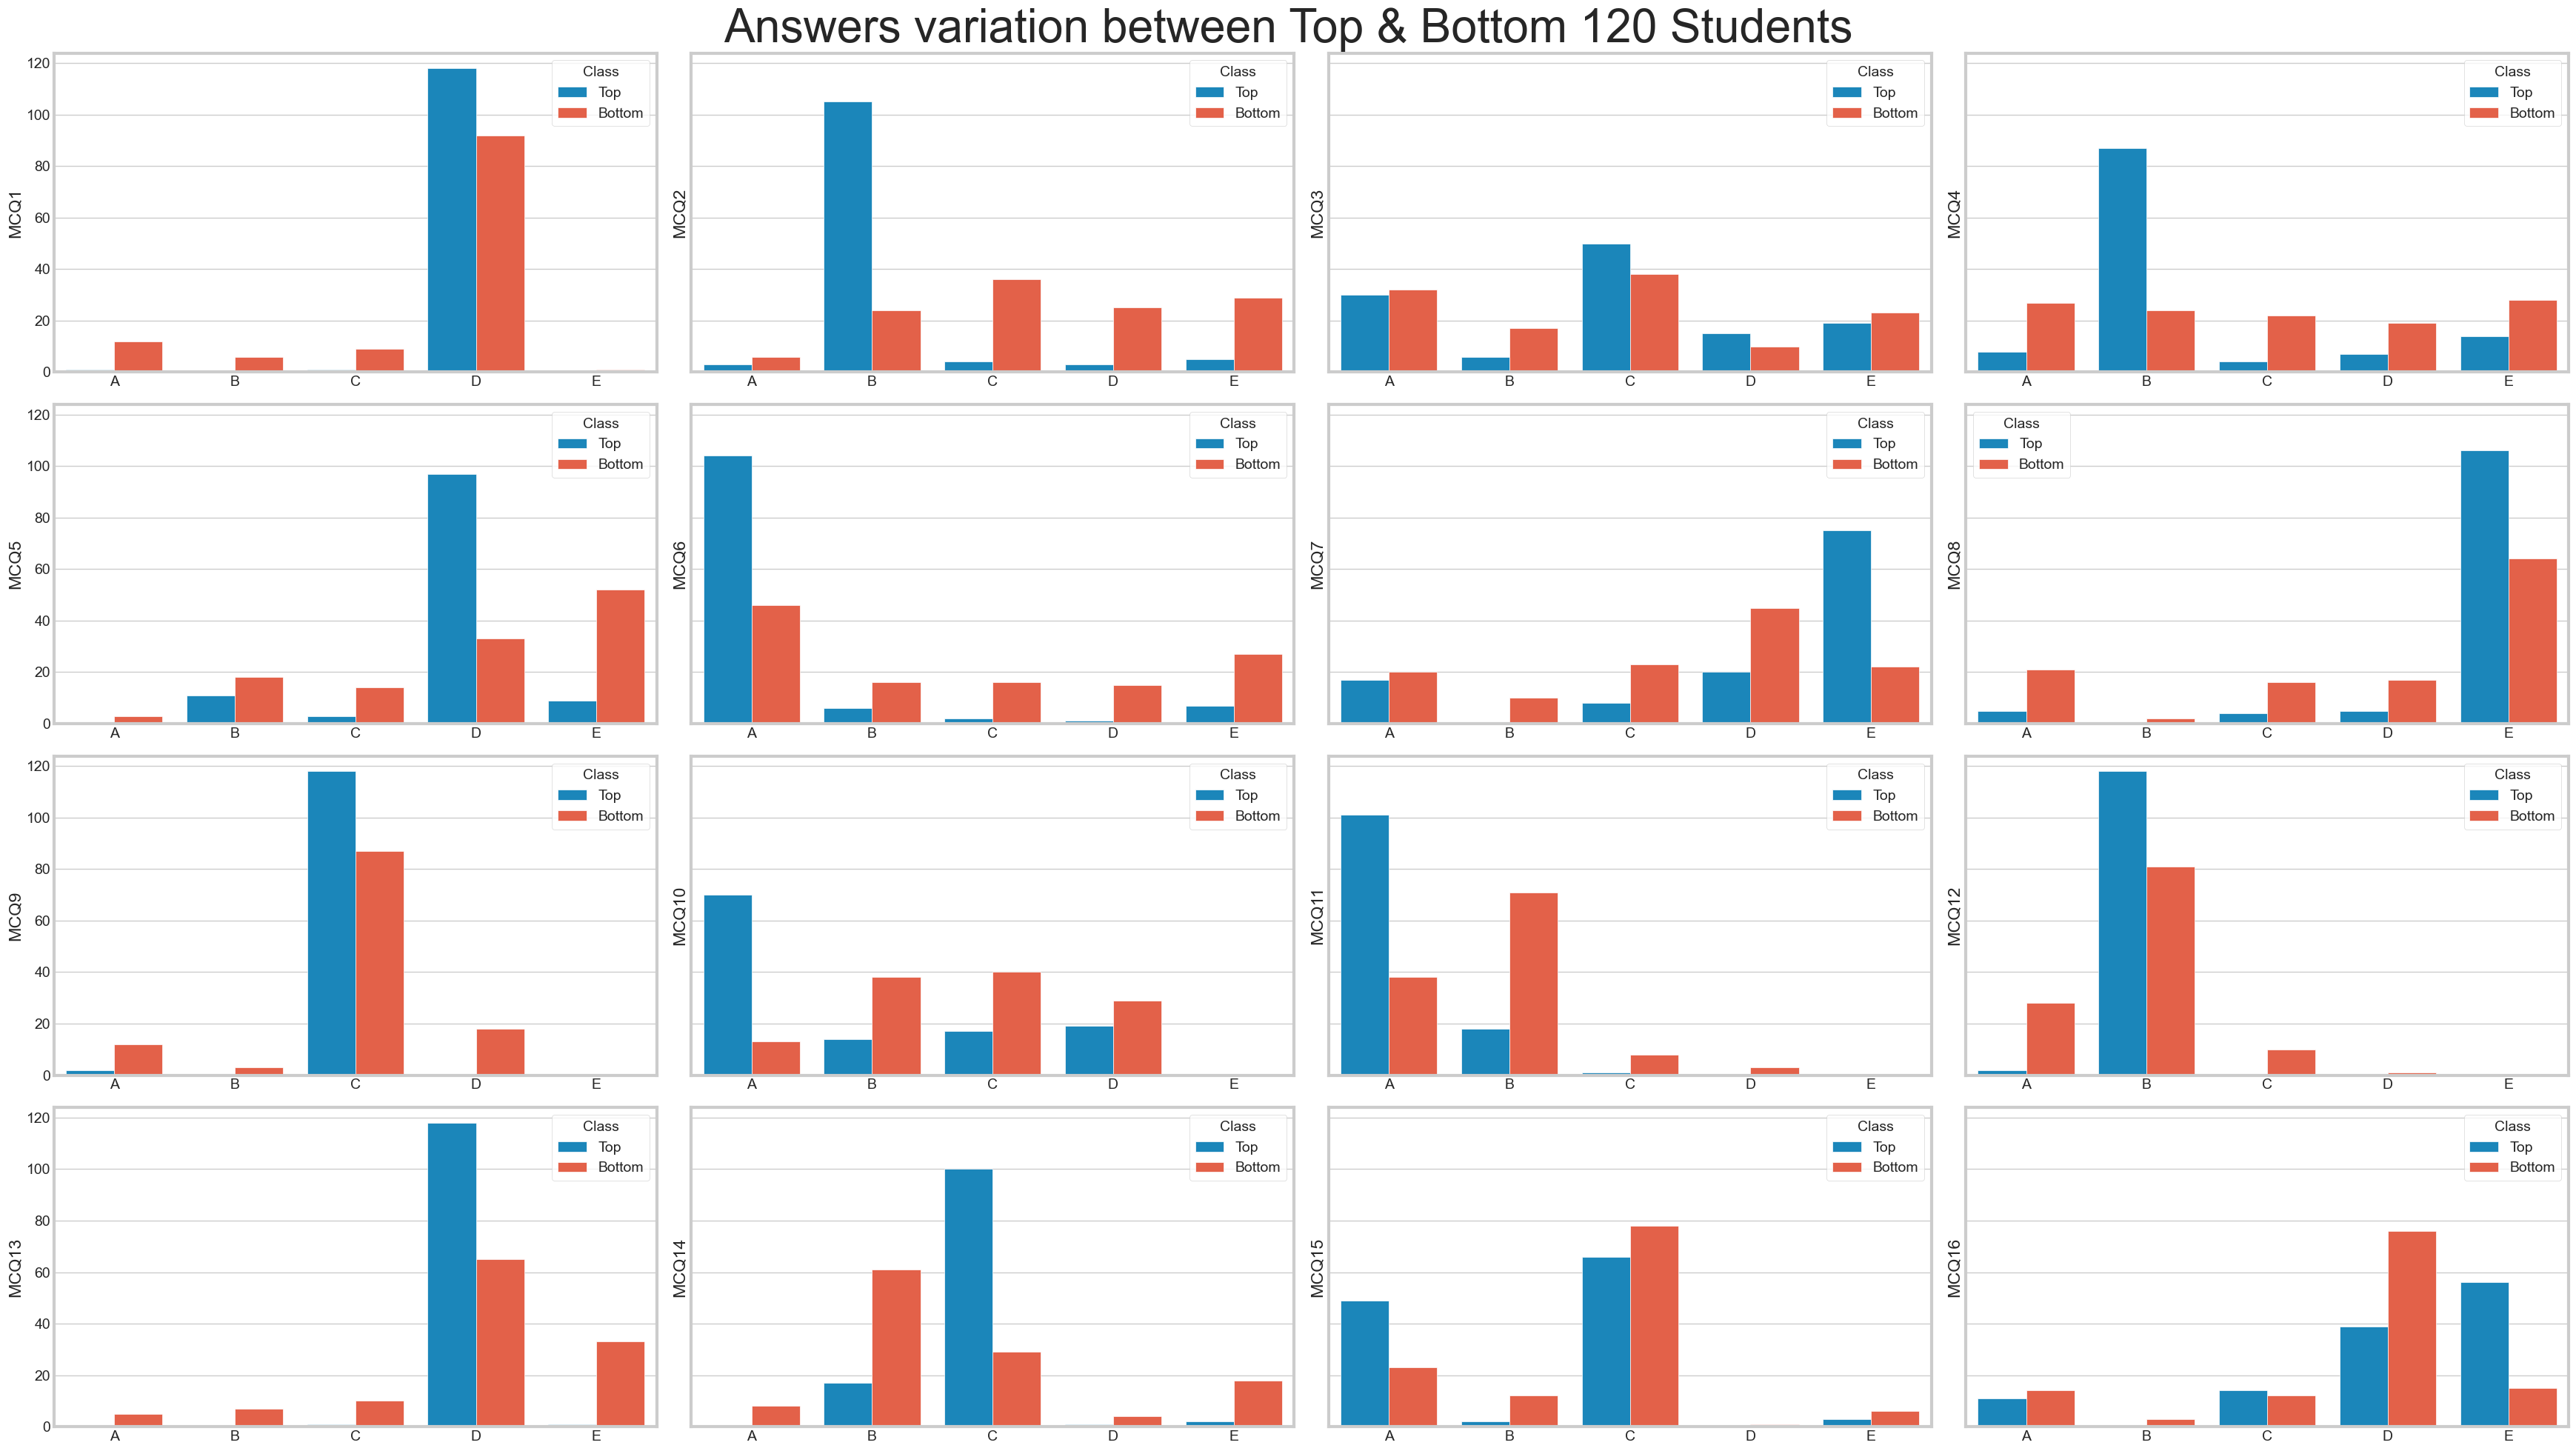

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(35, 20), sharey=True)
axs = axes.flatten()
i = 0
j = 0
q = 0
for i in range(0,4):
    for j in range(0,4):
        sns.barplot(data=dss,
                    x=dss.index,
                    y=questions[q],
                    hue='Class',
                    ax=axes[i,j])
        q += 1
fig.suptitle('Answers variation between Top & Bottom 120 Students', fontsize=45)
plt.tight_layout()
plt.show()

## Univariate Analysis
- Analyzing each question indevisualy
- averages of right answer for each question

In [17]:
# only on person got full mark, assuming all he's answers are correct
correct_ans

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade7_1
86,20210127,D,B,C,B,D,A,E,E,C,A,A,B,D,C,A,E,15,8.0


In [18]:
answers = correct_ans.loc[86][questions].to_list()

answers_dict = {}
for i,q in enumerate(questions):
    answers_dict[q] = answers[i]

answers_dict

{'MCQ1': 'D',
 'MCQ2': 'B',
 'MCQ3': 'C',
 'MCQ4': 'B',
 'MCQ5': 'D',
 'MCQ6': 'A',
 'MCQ7': 'E',
 'MCQ8': 'E',
 'MCQ9': 'C',
 'MCQ10': 'A',
 'MCQ11': 'A',
 'MCQ12': 'B',
 'MCQ13': 'D',
 'MCQ14': 'C',
 'MCQ15': 'A',
 'MCQ16': 'E'}

##### Function to plot number of correct answers versus the number of wrong answers

In [19]:
def correct_wrong_plot(question:str):
    correct_ans = answers_dict[question]
    print(f'Answer: {correct_ans}')
    correct_ans_count = df[question].value_counts()[correct_ans]
    wrong_ans_count = df.shape[0] - correct_ans_count
    print(f'Correct: {correct_ans_count}')
    print(f'Wrong: {wrong_ans_count}')
    
    plot_data = pd.DataFrame({'Wrong': wrong_ans_count, 'Correct': correct_ans_count}, index=[question])

    ax = plot_data.loc[question].plot(kind='barh', color=[color_pal[1], color_pal[0]])
    ax.set_title(f'Number of Correct and Wrong Answers for {question}')
    ax.grid(False)
    plt.show()

### MCQ1
- Question 1 seems like an easy question.

Answer: D
Correct: 550
Wrong: 51


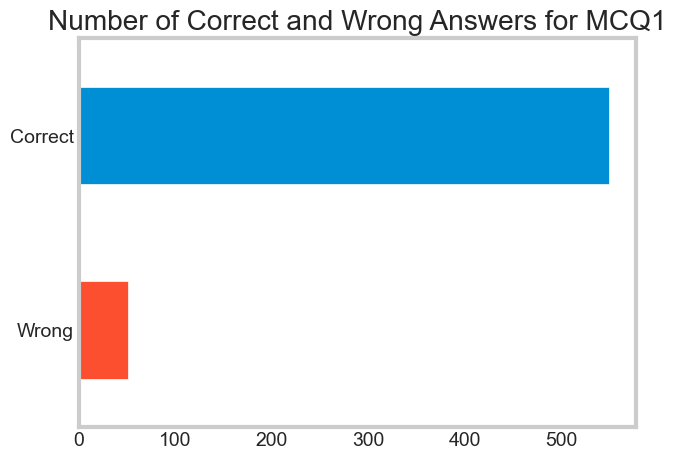

In [20]:
correct_wrong_plot('MCQ1')

### MCQ2
- Question 2 is a tricky question.

Answer: B
Correct: 351
Wrong: 250


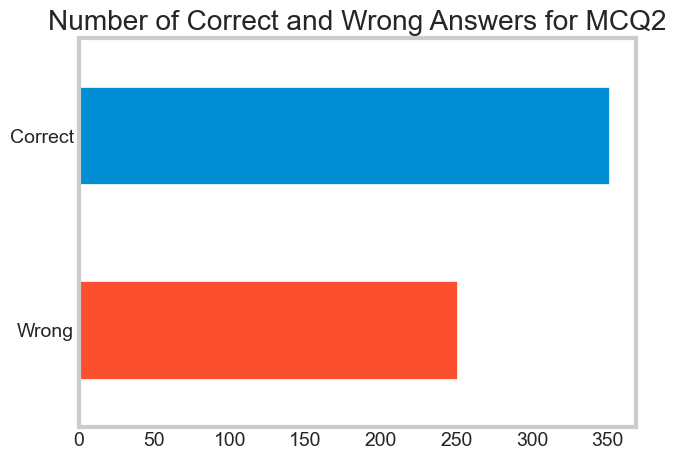

In [21]:
correct_wrong_plot('MCQ2')

### MCQ3
- Most of students choose a wrong answer
- Question 3 is a hard one.

Answer: C
Correct: 224
Wrong: 377


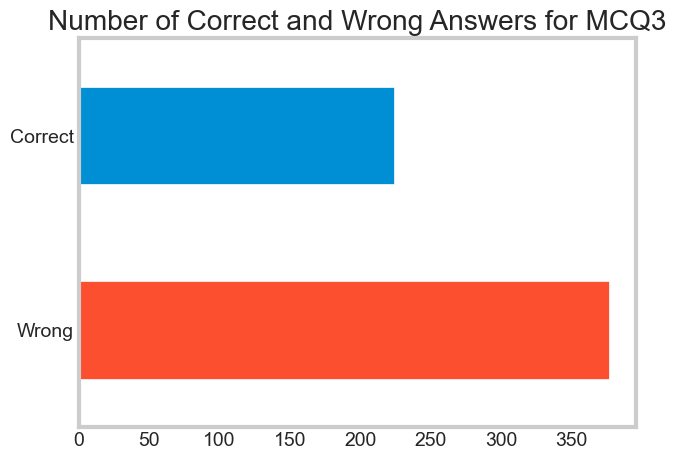

In [22]:
correct_wrong_plot('MCQ3')

### MCQ4
- Also most students choose the wrong answers.
- Question 4 is a hard one.

Answer: B
Correct: 261
Wrong: 340


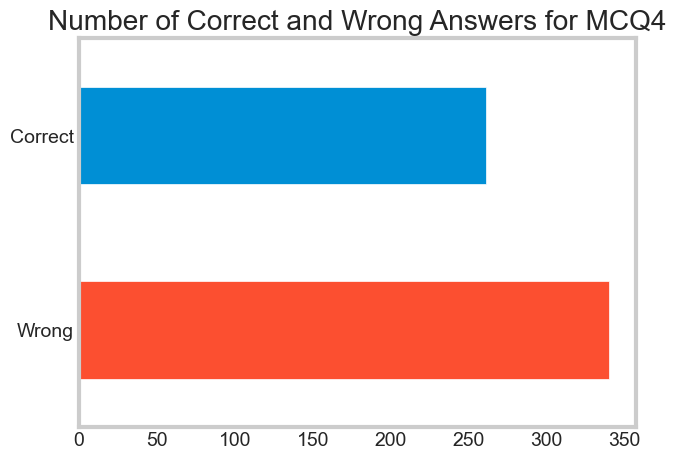

In [23]:
correct_wrong_plot('MCQ4')

### MCQ5
- seems a normal difficulty question.

Answer: D
Correct: 323
Wrong: 278


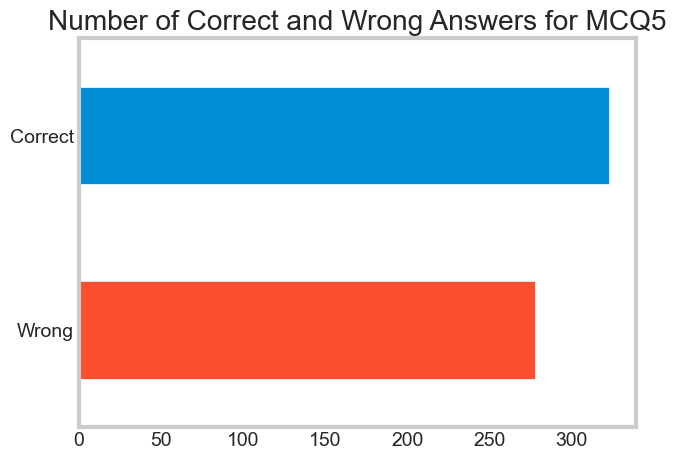

In [24]:
correct_wrong_plot('MCQ5')

### MCQ6
- A normal difficulty question.

Answer: A
Correct: 345
Wrong: 256


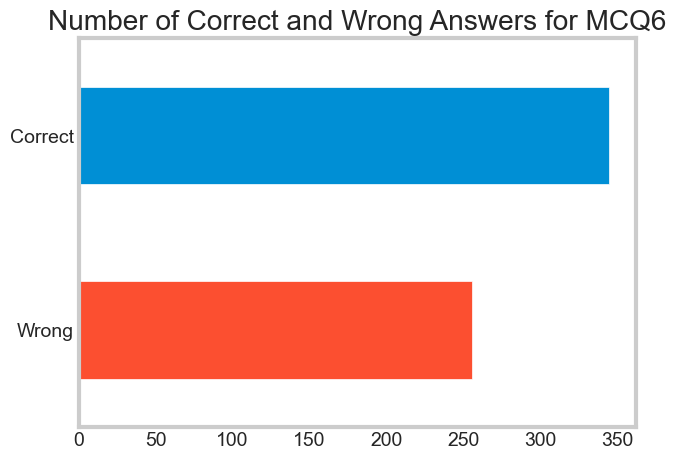

In [25]:
correct_wrong_plot('MCQ6')

### MCQ7
- most of the students choose the wrong answers.
- A true hard question.

Answer: E
Correct: 221
Wrong: 380


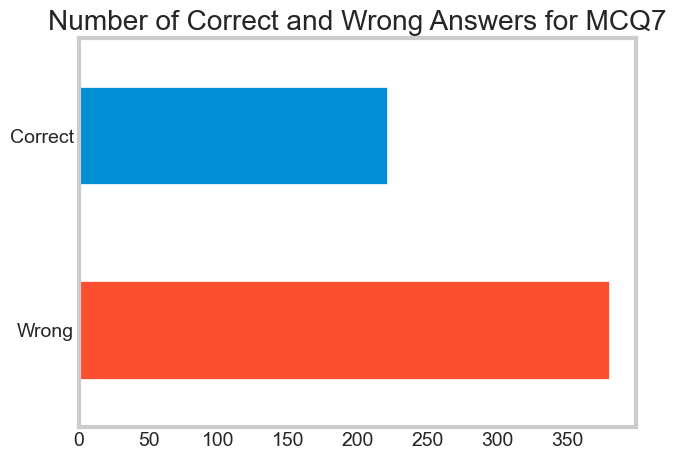

In [26]:
correct_wrong_plot('MCQ7')

### MCQ8
- Normal question (probably easy one).

Answer: E
Correct: 413
Wrong: 188


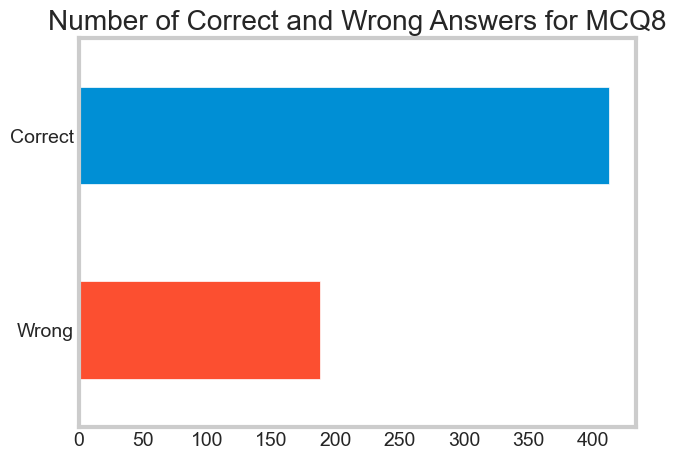

In [27]:
correct_wrong_plot('MCQ8')

### MCQ9
- Most of students answered this right.
- Easy question. 

Answer: C
Correct: 528
Wrong: 73


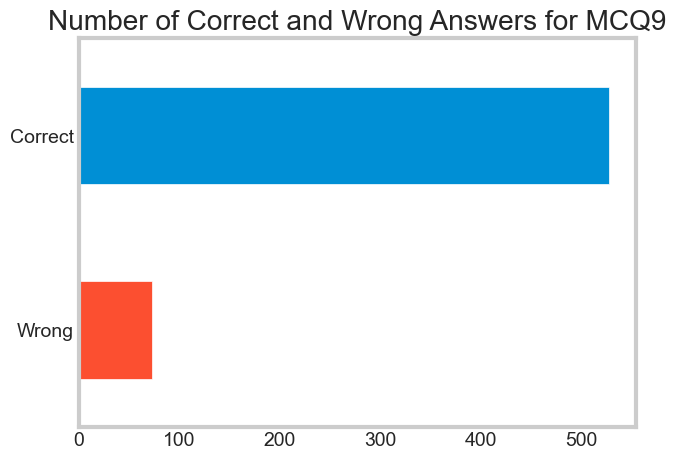

In [28]:
correct_wrong_plot('MCQ9')

### MCQ10
- Few students answered this correct.
- Very hard question.

Answer: A
Correct: 169
Wrong: 432


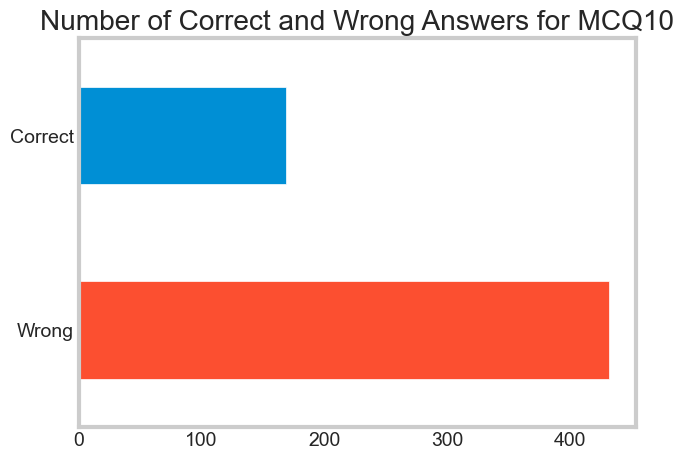

In [29]:
correct_wrong_plot('MCQ10')

### MCQ11
- Seems like a normal question.

Answer: A
Correct: 348
Wrong: 253


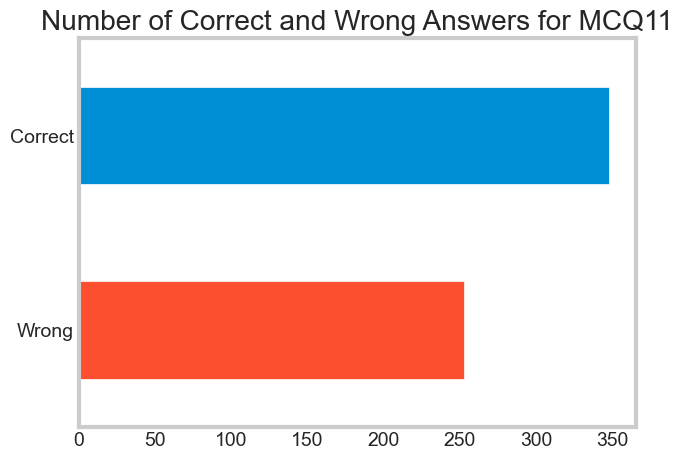

In [30]:
correct_wrong_plot('MCQ11')

### MCQ12
- Few students answered this wrong.
- Easy question.

Answer: B
Correct: 542
Wrong: 59


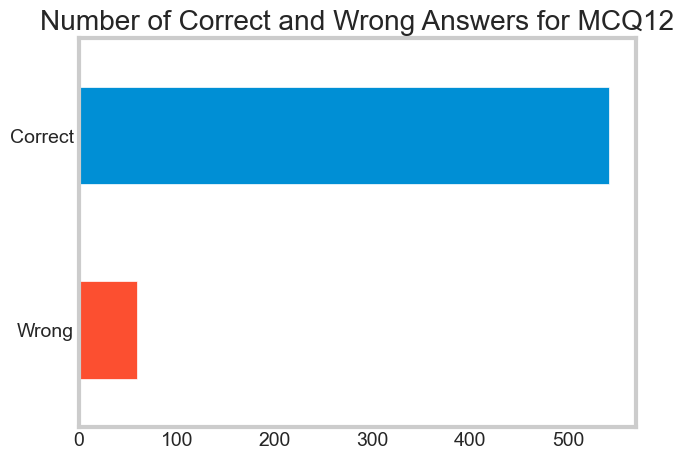

In [31]:
correct_wrong_plot('MCQ12')

### MCQ13
- Easy question.

Answer: D
Correct: 487
Wrong: 114


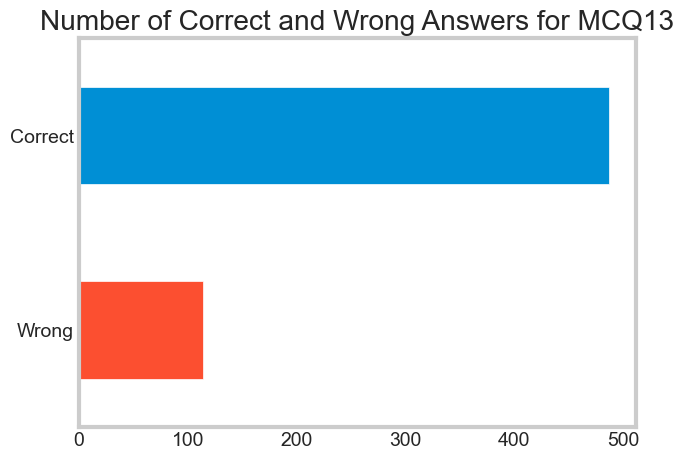

In [32]:
correct_wrong_plot('MCQ13')

### MCQ14
- 50/50, obviously a tricky one.

Answer: C
Correct: 307
Wrong: 294


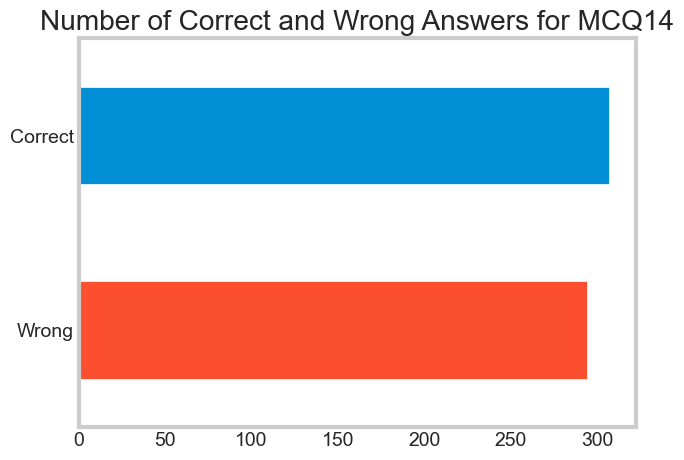

In [33]:
correct_wrong_plot('MCQ14')

### MCQ15
- Vary hard question as few students answered this right.

Answer: A
Correct: 162
Wrong: 439


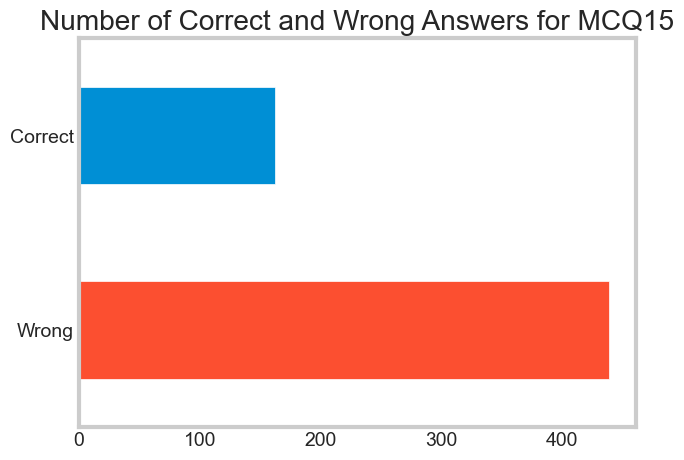

In [34]:
correct_wrong_plot('MCQ15')

### MCQ16
- Same as `MCQ15`, very hard question.

Answer: E
Correct: 154
Wrong: 447


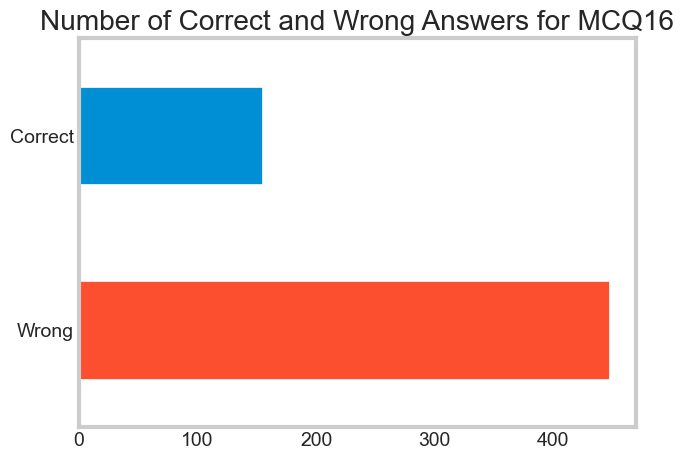

In [35]:
correct_wrong_plot('MCQ16')

## Conclusion
- Questions 1,9,12 and 13 are easy.
- Questions 2,5,6,8,11 have noraml level of difficulty.
- Questions 3,4,7,10,14,15 and 16 are very difficult.
- Questions 15 and 16 are so hard and tricky, even the answers vary between top and bottom groups.
##### After communicating the results with one of the students:
- For some issues in questions 15 and 16, the answers of the questions are changed by the teacher.
